## Test Visualize Lim-Opt data

In [6]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr

import sys
import cmocean
from tqdm import tqdm
#%% Set Paths, Import Custom Modules
stormtrack = 0
if stormtrack == 0:
    projpath   = "/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/02_stochmod/"
    datpath     = projpath + '01_Data/lim-opt/'
    rawpath     = projpath + '01_Data/model_input/'
    outpathdat  = datpath + '/proc/'
    figpath     = projpath + "02_Figures/20210927/"
   
    sys.path.append("/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/02_stochmod/03_Scripts/stochmod/model/")
    sys.path.append("/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/00_Commons/03_Scripts/")

elif stormtrack == 1:
    datpath     = "/stormtrack/data3/glliu/01_Data/02_AMV_Project/02_stochmod/Model_Data/model_output/"
    rawpath     = "/stormtrack/data3/glliu/01_Data/02_AMV_Project/02_stochmod/Model_Data/model_input/"
    outpathdat  = datpath + '/proc/'
    
    
    sys.path.append("/home/glliu/00_Scripts/01_Projects/00_Commons/")
    sys.path.append("/home/glliu/00_Scripts/01_Projects/01_AMV/02_stochmod/stochmod/model/")

from amv import proc,viz
import scm
import tbx
import glob

In [7]:
# Get list of files
nclist = glob.glob(datpath+"*.nc")
nclist.sort()
print(nclist)

['/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/02_stochmod/01_Data/lim-opt/COBE-AMO+PDO-LIMopt.nc', '/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/02_stochmod/01_Data/lim-opt/ERSST-AMO+PDO-LIMopt.nc', '/Users/gliu/Downloads/02_Research/01_Projects/01_AMV/02_stochmod/01_Data/lim-opt/HadISST-AMO+PDO-LIMopt.nc']


In [8]:

ds = xr.open_dataset(nclist[0])
ds.SSTAMO

<xarray.DataArray 'SSTAMO' (lat: 160, lon: 360)>
array([[-1.e-20, -1.e-20, -1.e-20, ..., -1.e-20, -1.e-20, -1.e-20],
       [-1.e-20, -1.e-20, -1.e-20, ..., -1.e-20, -1.e-20, -1.e-20],
       [-1.e-20, -1.e-20, -1.e-20, ..., -1.e-20, -1.e-20, -1.e-20],
       ...,
       [-1.e-20, -1.e-20, -1.e-20, ..., -1.e-20, -1.e-20, -1.e-20],
       [-1.e-20, -1.e-20, -1.e-20, ..., -1.e-20, -1.e-20, -1.e-20],
       [-1.e-20, -1.e-20, -1.e-20, ..., -1.e-20, -1.e-20, -1.e-20]],
      dtype=float32)
Coordinates:
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float64 79.5 78.5 77.5 76.5 75.5 ... -76.5 -77.5 -78.5 -79.5
Attributes:
    standard_name:  SSTAMO
    units:          K K-1

In [9]:
# Read out the values
amvids  = []
amvpats = []
lats    = []
lons    = []
times   = []
for n in tqdm(range(len(nclist))):
    
    # Read in indices, lat, time
    ds = xr.open_dataset(nclist[n])
    amvids.append(ds.AMO.values)
    lats.append(ds.lat.values)
    times.append(ds.time.values)
    
    # Flip the longitude
    amvpat = ds.SSTAMO.values
    lon360 = ds.lon.values
    lon180,amvpat180 = proc.lon360to180(lon360,amvpat.T)
    
    amvpat180[np.where(np.abs(amvpat180) < 1e-10)] = np.nan
    # Save the amvpat and lons
    amvpats.append(amvpat180)
    lons.append(lon180)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 181.48it/s]


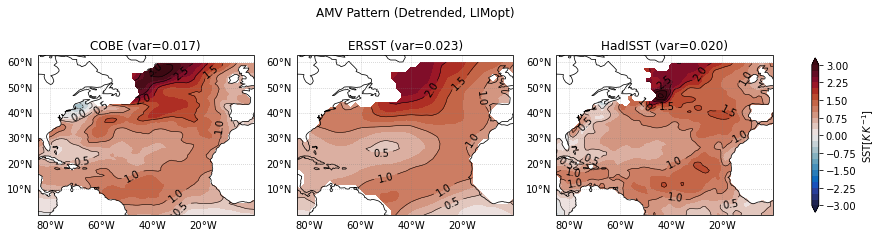

In [11]:
# Plotting Parameters
bboxplot = [-85,0,0,55]
#cint     = np.arange(-0.45,0.50,0.05) # Used this for 7/26/2021 Meeting
#cl_int   = np.arange(-0.45,0.50,0.05)

cint = np.arange(-4,4.25,0.25)
cint = np.arange(-3,3.25,.25)
cl_int = np.arange(-4,4.5,.5)

names   = ["COBE","ERSST","HadISST"]
fig,axs = plt.subplots(1,3,figsize=(14,4),
                       subplot_kw={"projection": ccrs.PlateCarree()})
for i in range(len(nclist)):
    ax = axs.flatten()[i]
    ax.set_title(names[i]+ " (var=%.3f)"%(np.var(amvids[i])))
    ax = viz.add_coast_grid(ax,bbox=bboxplot)
    
    cf = ax.contourf(lons[i],lats[i],amvpats[i].T,levels=cint,cmap=cmocean.cm.balance,extend="both")
    cl = ax.contour(lons[i],lats[i],amvpats[i].T,levels=cl_int,colors='k',linewidths=0.55)
    ax.clabel(cl)

cb = fig.colorbar(cf,ax=axs.flatten(),fraction=0.009)
cb.set_label("SST[$K\,K^{-1}$]")
plt.suptitle("AMV Pattern (Detrended, LIMopt)",y=0.95)
plt.savefig("%sAMV_Pattern_LIMopt_obs.png"%(figpath),dpi=150,bbox_inches='tight')

In [ ]:
times[0]

In [ ]:
np.where(amvpat180 == 0)

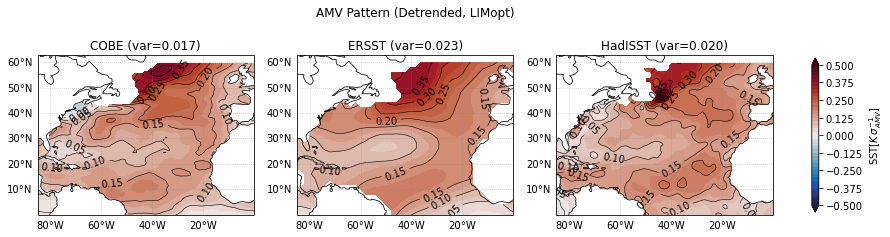

In [33]:
# Plotting Parameters
bboxplot = [-85,0,0,55]
#cint     = np.arange(-0.45,0.50,0.05) # Used this for 7/26/2021 Meeting
#cl_int   = np.arange(-0.45,0.50,0.05)


clim = .5 #0.025
cstp = 0.025

#cint = np.arange(-4,4.25,0.25)
cint = np.arange(-clim,clim+cstp,cstp)
cl_int = np.arange(-clim,clim+cstp*2,cstp*2)

names   = ["COBE","ERSST","HadISST"]
fig,axs = plt.subplots(1,3,figsize=(14,4),
                       subplot_kw={"projection": ccrs.PlateCarree()})
for i in range(len(nclist)):
    ax = axs.flatten()[i]
    ax.set_title(names[i]+ " (var=%.3f)"%(np.var(amvids[i])))
    ax = viz.add_coast_grid(ax,bbox=bboxplot)
    
    cf = ax.contourf(lons[i],lats[i],amvpats[i].T*np.std(amvids[i]),levels=cint,cmap=cmocean.cm.balance,extend="both")
    cl = ax.contour(lons[i],lats[i],amvpats[i].T*np.std(amvids[i]),levels=cl_int,colors='k',linewidths=0.55)
    ax.clabel(cl)

cb = fig.colorbar(cf,ax=axs.flatten(),fraction=0.009)
cb.set_label("SST[$K\,\sigma_{AMV}^{-1}$]")
plt.suptitle("AMV Pattern (Detrended, LIMopt)",y=0.95)
plt.savefig("%sAMV_Pattern_LIMopt_obs_perstd.png"%(figpath),dpi=150,bbox_inches='tight')

## Decide on some bounding boxes

In [29]:

bbox_SP    = [-60,-15,40,65]
bbox_ST_e  = [-80,-40,20,40]
bbox_ST_w  = [-40,-10,20,40]
bbox_TR    = [-75,-15,10,20]
bbox_NA    = [-80,0 ,10,65]
bboxes     = (bbox_SP,bbox_ST_w,bbox_ST_e,bbox_TR,bbox_NA) # Bounding Boxes
regions    = ("SPG","STGw","STGe","TRO","NAT","NAT")#,"NNAT")        # Region Names
regionlong = ("Subpolar","Subtropical (West)","Subtropical (East)","Tropical","North Atlantic (10N-65N)")
bbcol      = ["Blue","Red","cornflowerblue","Yellow","Black"]
bbsty      = ["solid","dashed","dotted","solid","dotted"]

# bbox1 = [-60,]
# bbox2 = []
# regions = []
# bbcol   = []
# bbsty   = []

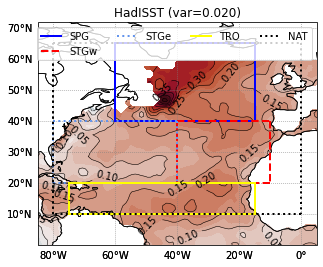

In [31]:
# Decide on some bounding Boxes (need to check back on the literature

bboxplotn = [-85,5,0,65]

fig,ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree()},figsize=(5,5))
ax = viz.add_coast_grid(ax,bboxplot)

# Plot HadISST, lim-opt detrend
i = -1
ax.set_title(names[i]+ " (var=%.3f)"%(np.var(amvids[i])))
ax = viz.add_coast_grid(ax,bbox=bboxplotn)
cf = ax.contourf(lons[i],lats[i],amvpats[i].T*np.std(amvids[i]),levels=cint,cmap=cmocean.cm.balance,extend="both")
cl = ax.contour(lons[i],lats[i],amvpats[i].T*np.std(amvids[i]),levels=cl_int,colors='k',linewidths=0.55)
ax.clabel(cl)

ls = []
for bb in [0,1,2,3,5]:
    ax,ll = viz.plot_box(bboxes[bb],ax=ax,leglab=regions[bb],
                         color=bbcol[bb],linestyle=bbsty[bb],linewidth=2,return_line=True)
    ls.append(ll)
ax.legend(ncol=4)

In [34]:
times

[array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
        100., 101., 102., 103., 104., 105., 106.]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.